In [32]:
import pandas as pd
import numpy as np

In [33]:
data=pd.read_csv("C:/Users/Rehaman shaik/Downloads/Regrerssion_energy_production_data.csv",delimiter=';')
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [ ]:
#exploratory data analysis

In [34]:
# Display the first few rows of the dataset
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [35]:
# Display the last few rows of the dataset
data.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [36]:
# Check for missing values

In [37]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [38]:
# Descriptive statistics

In [39]:
data.describe

<bound method NDFrame.describe of       temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 co

In [40]:
# Check data types

In [41]:
data.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [42]:
# Check for duplicated rows
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17  

In [43]:
#Remove Duplicated Rows

In [44]:
data_new = data.drop_duplicates()

In [45]:
data_new

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [46]:
# Visualize data distributions and relationships

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


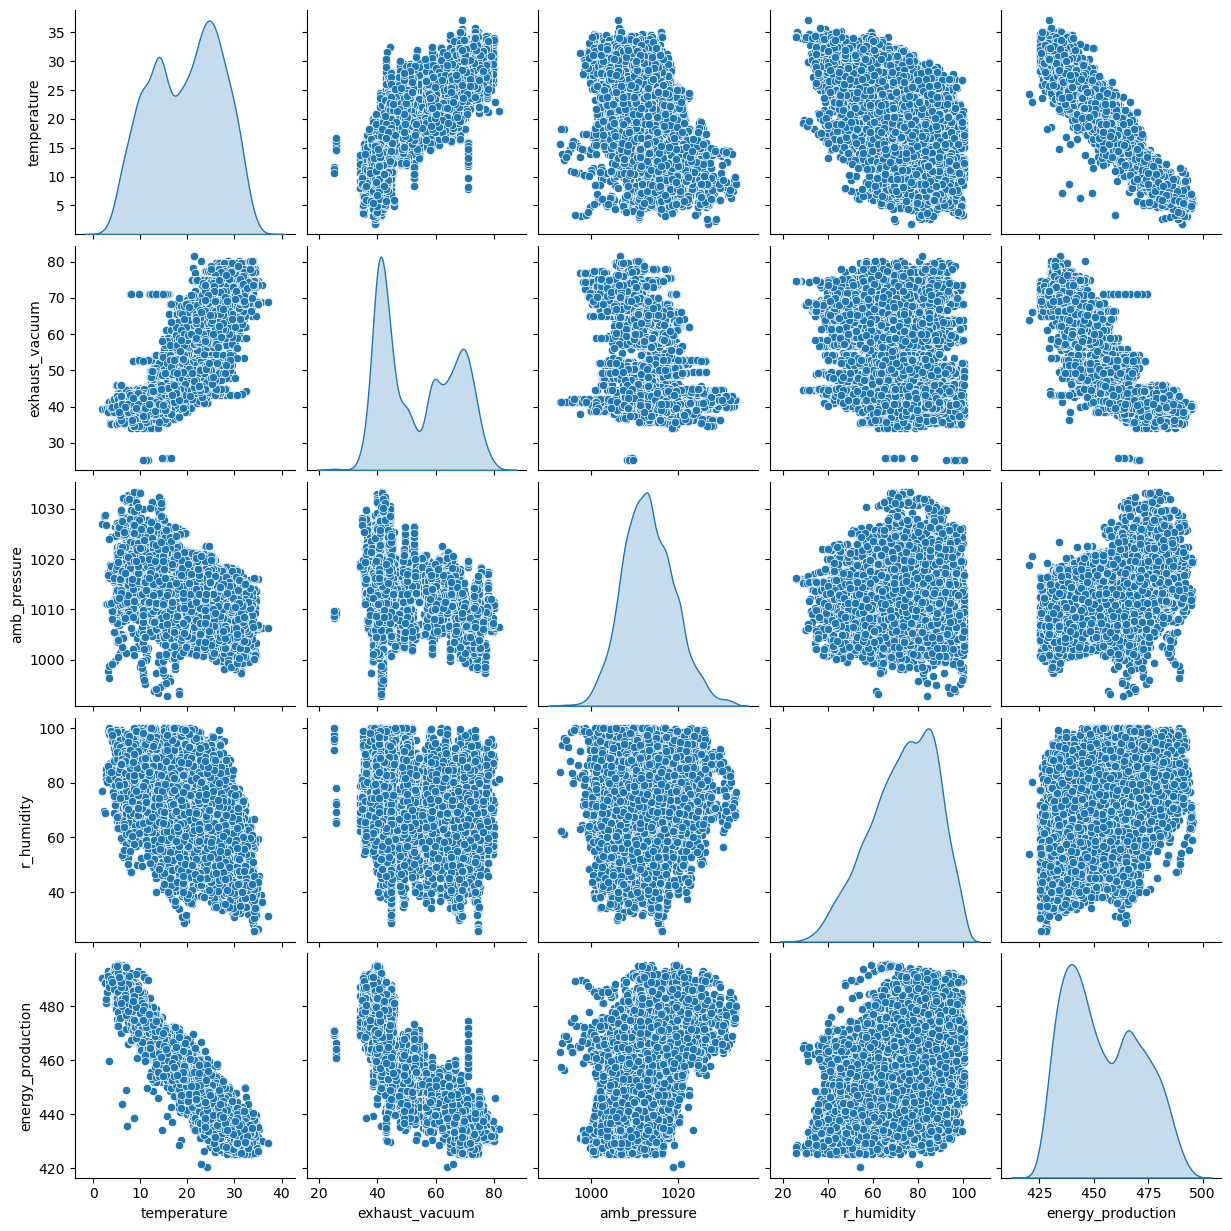

In [48]:
sns.pairplot(data_new,diag_kind="kde")
plt.show()

In [49]:
# Correlation heatmap

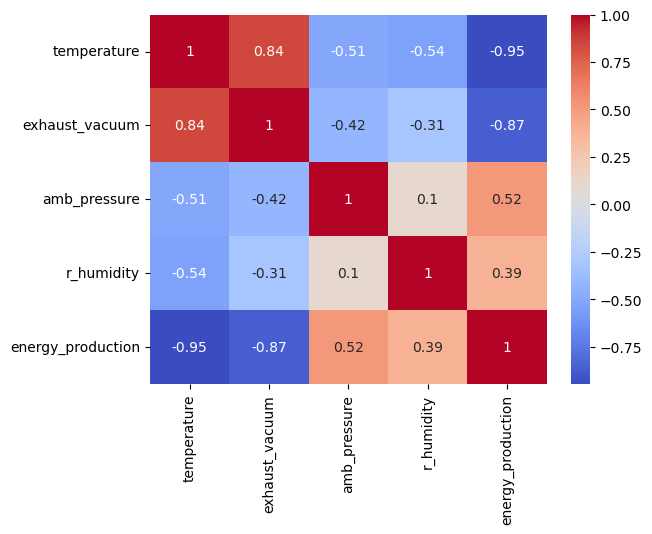

In [50]:
correlation_matrix = data_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Distribution of Energy Production

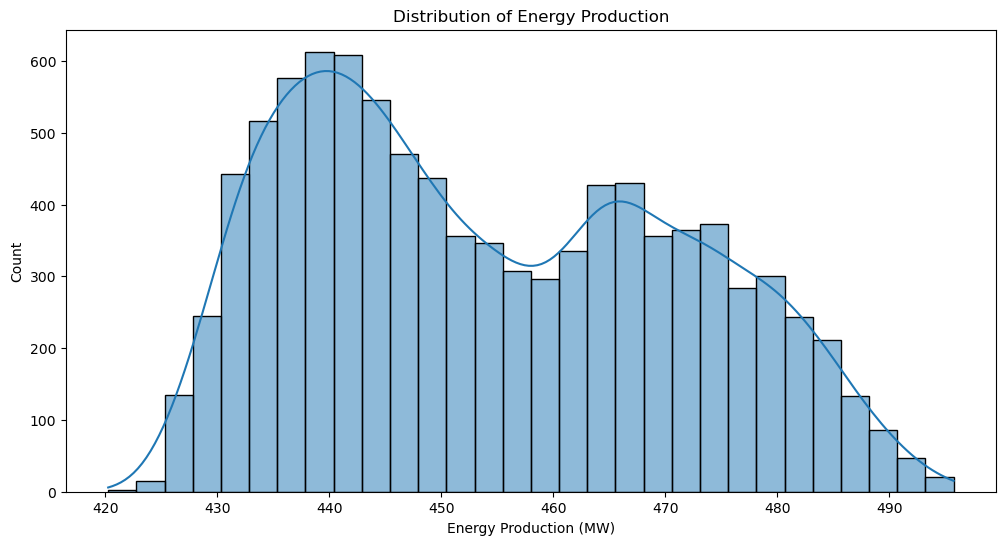

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(data_new['energy_production'], bins=30, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production (MW)')
plt.show()


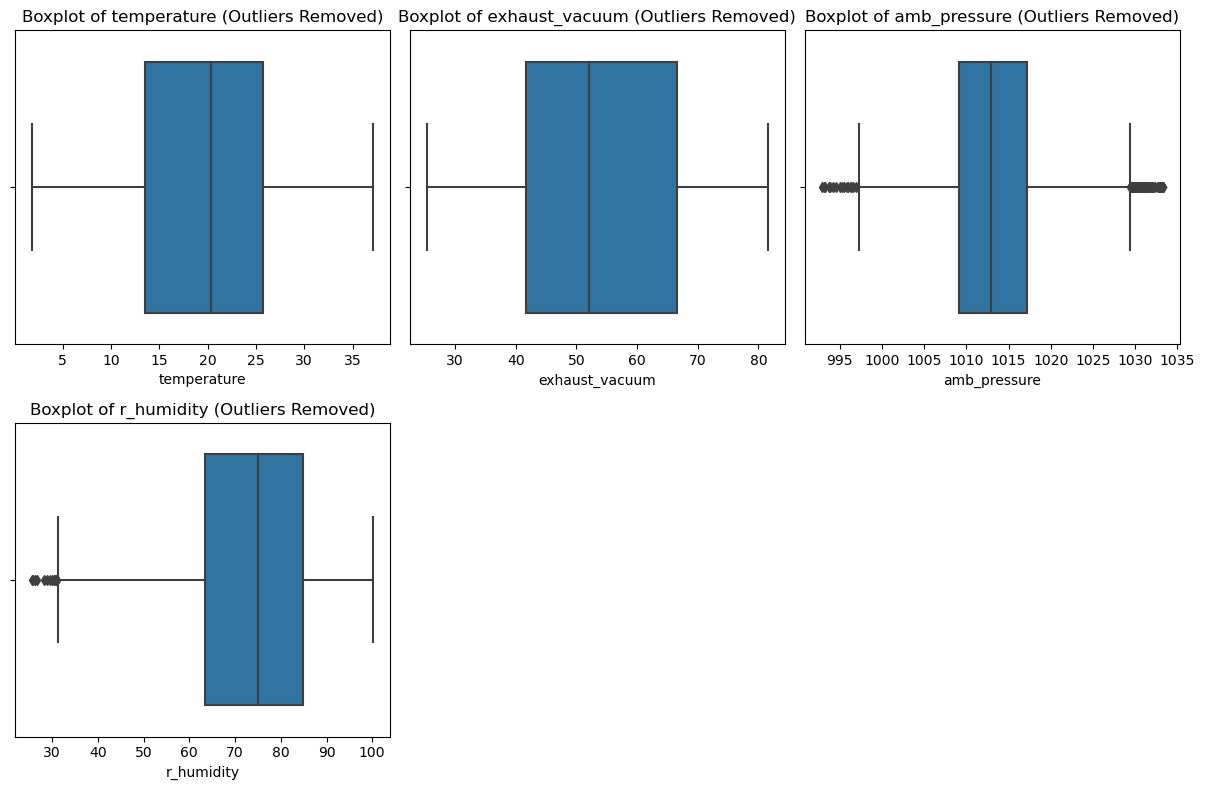

In [53]:
# Display the boxplot for each numerical column 
plt.figure(figsize=(12, 8))
for i, col in enumerate(data_new.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data_new[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()


In [54]:
# Identify and remove outliers for each numerical column
for col in data_new.columns[:-1]:  # Exclude the target variable
    q1 = data_new[col].quantile(0.25)
    q3 = data_new[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and print outliers
    outliers = data_new[(data_new[col] < lower_bound) | (data_new[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

    # Drop outliers from the DataFrame
    df = data_new.drop(outliers.index)

Outliers in temperature:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in exhaust_vacuum:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in amb_pressure:
      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48          

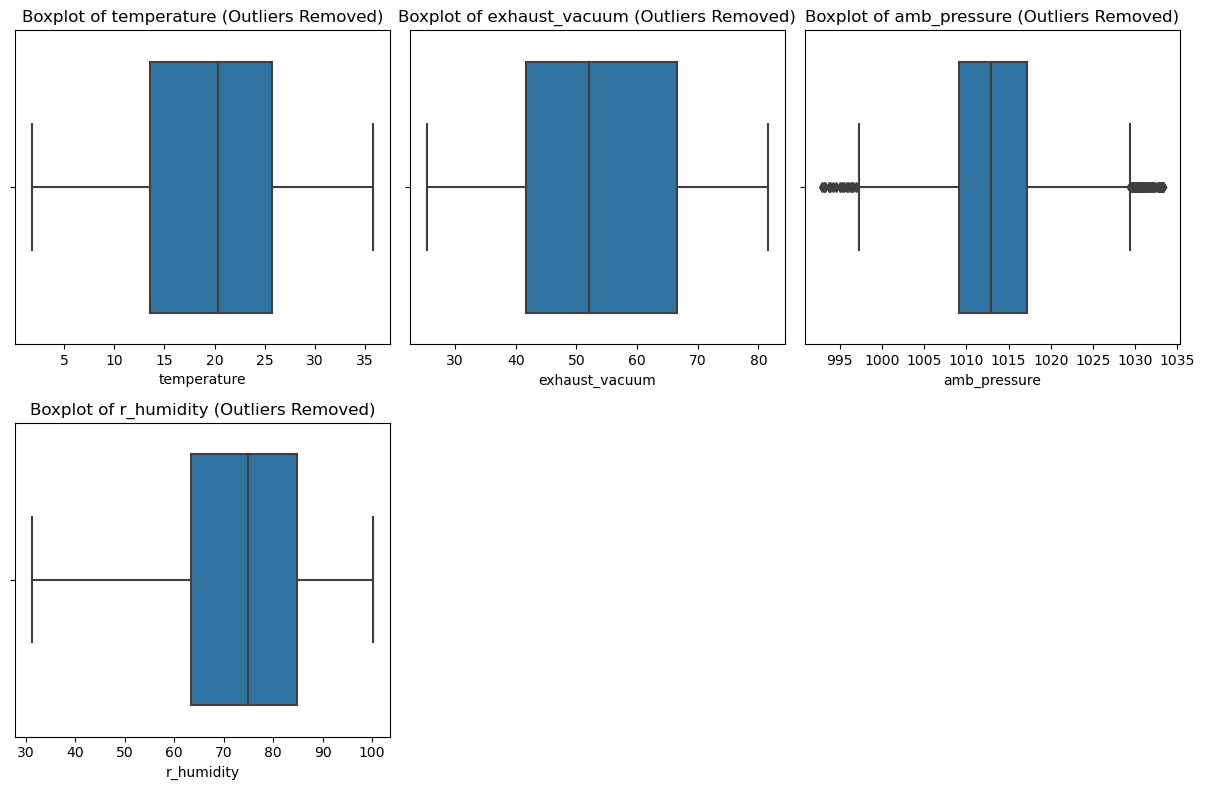

In [55]:
# Boxplot for each numerical column after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [56]:
#due to the amb_pressure having higher values we should change the IQR Value according to it

In [59]:
'''deciding whether to delete or modify the outliers requires careful consideration
 our amb_pressure have 30% outliers so lets modify the data rather than the deleting 
 because it may contains the valuable information '''

'deciding whether to delete or modify the outliers requires careful consideration\n our amb_pressure have 30% outliers so lets modify the data rather than the deleting \n because it may contains the valuable information '

In [60]:
'''Winsorizing involves replacing extreme values with a specific threshold value.
This limits the influence of outliers without removing them completely.
There are several ways to modify outliers in your data,'''

'Winsorizing involves replacing extreme values with a specific threshold value.\nThis limits the influence of outliers without removing them completely.\nThere are several ways to modify outliers in your data,'

In [61]:
# Calculate the IQR
iqr = np.percentile(df["amb_pressure"], 75) - np.percentile(df["amb_pressure"], 25)

# Define the threshold values
lower_bound = np.median(df["amb_pressure"]) - 1.5 * iqr
upper_bound = np.median(df["amb_pressure"]) + 1.5 * iqr

# Replace outliers with threshold values
df["amb_pressure"] = np.clip(df["amb_pressure"], lower_bound, upper_bound)

In [62]:
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [63]:
#lets again check the oultiers for our modified data

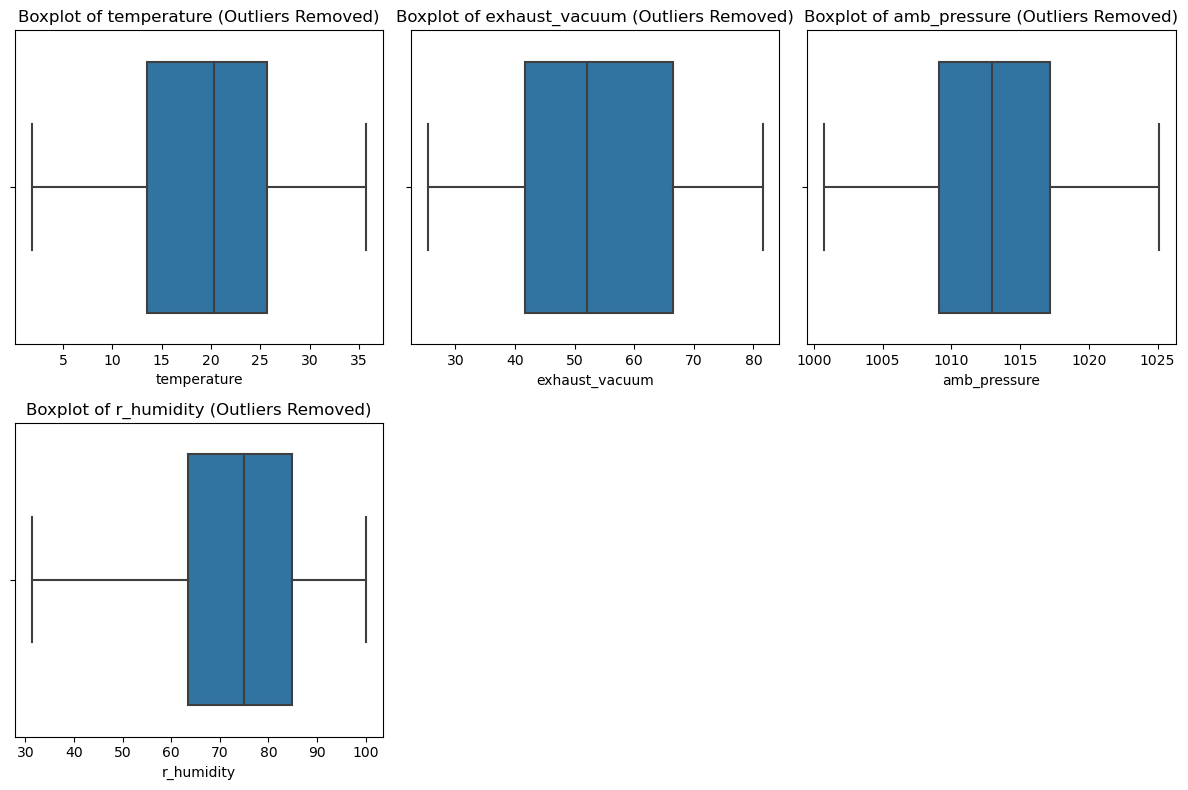

In [64]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [65]:
# Model Building


In [66]:
#assigning the target variable
y=df['energy_production']
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9514, dtype: float64

In [67]:
x= df.drop('energy_production', axis=1)

In [68]:
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [69]:
# Split the data into training and testing sets

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x , y ,test_size=0.30,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression

In [75]:
# Train a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [76]:
#Lets Train a random forest model also
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
#  Model Evaluation

In [78]:
linear_pred=linear_reg_model.predict(x_test)
random_forest_prediction=random_forest_model.predict(x_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate linear regression model
linear_reg_mse = mean_squared_error(y_test, linear_pred)
linear_reg_r2 = r2_score(y_test, linear_pred)

In [81]:
# Evaluate random forest model
random_forest_mse = mean_squared_error(y_test, random_forest_prediction)
random_forest_r2 = r2_score(y_test, random_forest_prediction)

In [82]:
print("Linear Regression - Mean Squared Error:", linear_reg_mse)
print("Linear Regression - R^2 Score:", linear_reg_r2)


Linear Regression - Mean Squared Error: 20.40457259092474
Linear Regression - R^2 Score: 0.9288597388961464


In [83]:
print("\nRandom Forest - Mean Squared Error:", random_forest_mse)
print("Random Forest - R^2 Score:", random_forest_r2)


Random Forest - Mean Squared Error: 11.098975398746026
Random Forest - R^2 Score: 0.9613035752484608


In [ ]:
'''Based on the provided metrics, the Random Forest model appears to
outperform the Linear Regression model in terms of both MSE and R².'''